In [30]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [31]:
def plotOutliers(data, palette="turbo"):
    ax = sns.violinplot(data=data, inner=None, linewidth=0, saturation=0.4)
    sns.boxplot(data=data, palette=palette, width=0.3,
            boxprops={'zorder': 2}, ax=ax)

Since violin and box plots are not 100% accurate, we are going to 
calculate the IQR (InterQuartile Range) to make sure to remove the actual outliers. 
steps: 
1. Calculate the first and third quartile (Q1 and Q3).
2. Further, evaluate the interquartile range, IQR = Q3-Q1.
3. Estimate the lower bound, the lower bound = Q1*1.5
4. Estimate the upper bound, upper bound = Q3*1.5
5. Replace the data points that lie outside of the lower and the upper bound with a NULL value.

In [32]:
def highlightOutliers(df, column):
    q75, q25 = np.percentile(df.loc[:, column], [75, 25])  # step 1
    intr_qr = q75 - q25  # step 2

    max = q75 + (1.5 * intr_qr)  # step 3
    min = q25 - (1.5 * intr_qr)  # step 4

    df.loc[df[column] < min, column] = np.nan  # step 5
    df.loc[df[column] > max, column] = np.nan  # step 5

In [33]:
def removeOutliers(df):
    # dropping rows with null values
    return df.dropna(axis=0)

In [34]:
df = pd.read_csv("./dataset.csv")
# extract 'latitude' and 'longitude' columns
X = df.loc[:, ['latitude', 'longitude']]
X.head(5)

,latitude,longitude
0,36.5367,-95.9264
1,39.2920,-75.0097
2,41.9170,-104.2955
3,44.1810,-94.0391
4,32.8560,-116.9040


The first step we are gonna do is the outliers removal from the dataset X. 
We are gonna use violin plots to show the distribution of the variables and
box plots to show in a more precise way the outliers dividing the distribution
into 3 quartiles. 

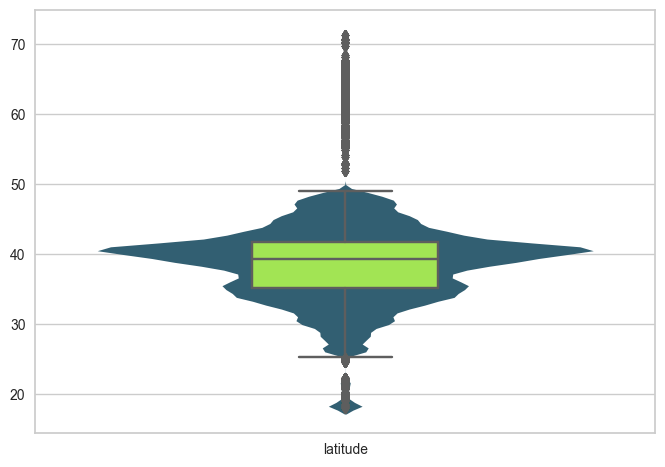

In [35]:
# identifing outliers for latitude
plotOutliers(X[['latitude']])

In [36]:
highlightOutliers(X, 'latitude')
X.isnull().sum()

latitude     12797
longitude        0
dtype: int64

In [37]:
X = removeOutliers(X)
X.isnull().sum()

latitude     0
longitude    0
dtype: int64

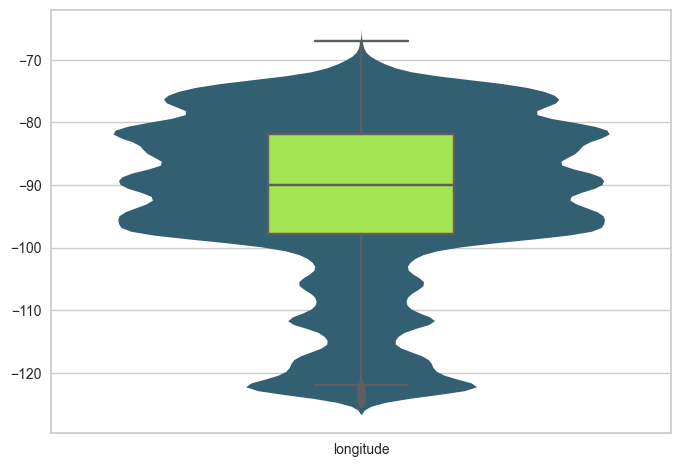

In [38]:
# identifing outliers for longitude
plotOutliers(X[['longitude']])

In [39]:
highlightOutliers(X, 'longitude')
X.isnull().sum()

latitude         0
longitude    16987
dtype: int64

In [40]:
X = removeOutliers(X)
X.isnull().sum()

latitude     0
longitude    0
dtype: int64

We are gonna use the KMeans algorithm to cluster the data. First 
we are gonna find the elbow point to identify the right number of clusters 
to generate. Running the KMeans alghorithm multiple times beacuse it usually converges
prematurely. 

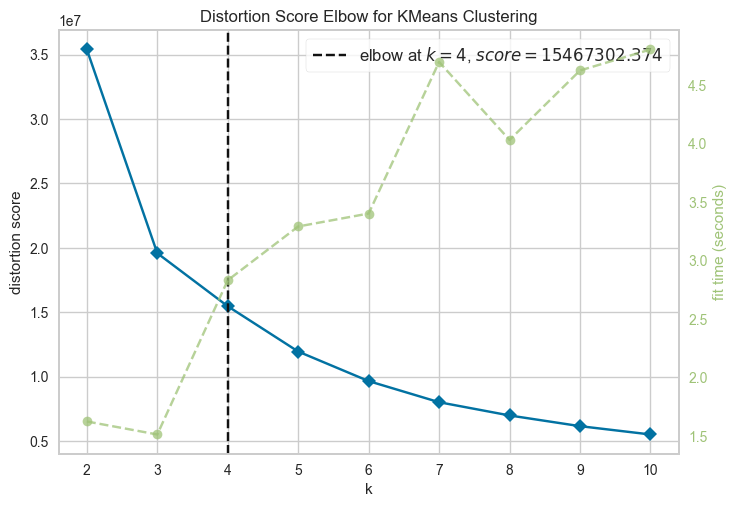

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
k_clusters = 10
model = KMeans(n_clusters=k_clusters, init="k-means++", random_state=0, n_init=10)

visualizer = KElbowVisualizer(model, timings=True)
visualizer.fit(X)
visualizer.show()

Once we have identified the elbow point k, we run again the KMeans alghortim
making it generate k clusters.

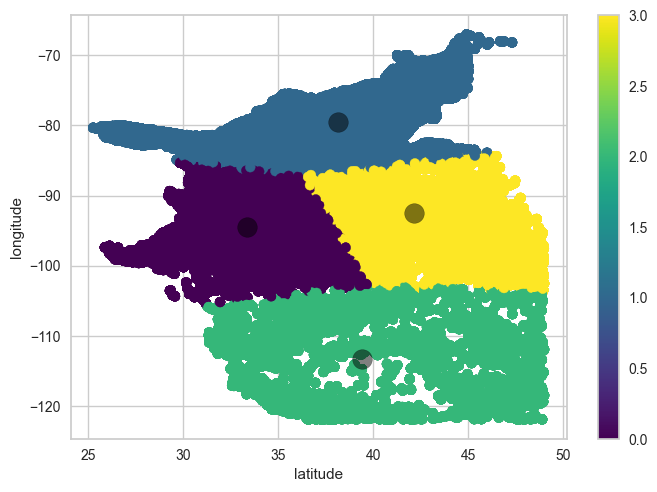

In [42]:
kmeans_instances = KMeans(n_clusters=visualizer.elbow_value_, init="k-means++", random_state=0, n_init=10)
# Compute k-means
kmeans_instances.fit(X)
cluster_label = kmeans_instances.fit_predict(X)
centers = kmeans_instances.cluster_centers_  # Coordinates of cluster
labels = kmeans_instances.predict(X)  # Labels of each point

# draw results
X.plot.scatter(x='latitude', y='longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

Comparing silhouette scores

In [ ]:
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

C:\Users\Francesco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
